# 9绘图和可视化
## 9.1matplotlib API入门

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

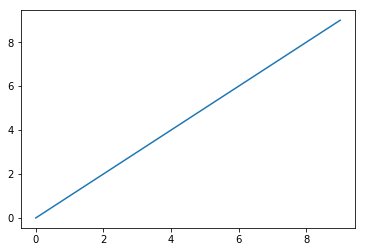

In [6]:
plt.plot(data)

### 9.1.1Figure和Subplot

In [15]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [16]:
ax1 = fig.add_subplot(2,2,1)


In [17]:
ax2 = fig.add_subplot(2,2,2)

In [18]:
ax3 = fig.add_subplot(2,2,3)

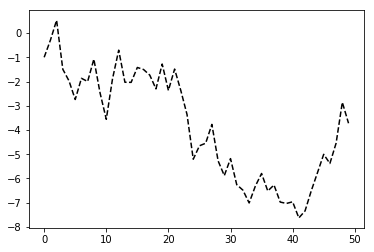

In [21]:
plt.plot(np.random.randn(50).cumsum(),'k--')

### 9.1.2调整subplot周围的间距

matplotlib绘图时，subplot外围会留有空白边距，各个subplot之间也留有间距。
调整这两种间距的大小。用subplots_ajust(left=,bottom=,right=,top=,wspace=,hspace)函数，来设置。

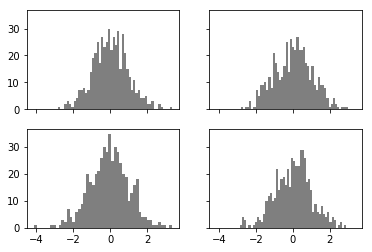

In [8]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',
        alpha=0.5)
#plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [6]:
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

<Figure size 432x288 with 0 Axes>

### 9.1.3 颜色、标记和线型

matplotlib的plot函数，接受一组x,y坐标，还接受一个表示颜色和线型的字符串缩写。
ax.plot(x,y,'g--')
或
ax.plot(x,y,linestyle='--',color='g')


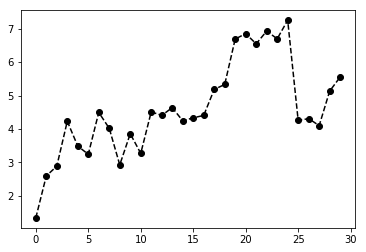

In [9]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')

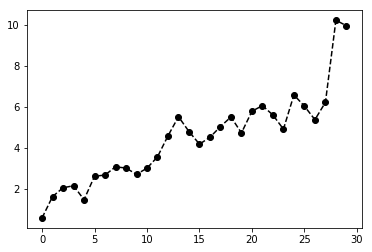

In [12]:
plt.plot(randn(30).cumsum(),color='k',linestyle='--',marker='o')

In [16]:
data = np.random.randn(30).cumsum()
data

array([1.9462139 , 2.20716029, 4.69256153, 4.62455707, 4.56940699,
       1.97953807, 3.45414384, 2.99407419, 2.9642784 , 3.05322517,
       2.13745445, 4.54340404, 5.37448909, 5.45808094, 5.45375439,
       4.9436038 , 4.37964474, 2.52859033, 4.09042411, 2.37303243,
       2.38749672, 0.6705181 , 0.68094116, 2.18389683, 1.44446848,
       3.07124607, 3.6176293 , 4.73395826, 3.86620609, 3.27603265])

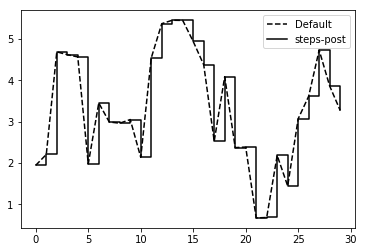

In [23]:
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

### 9.1.4刻度、标签和图例

图标装饰，有两种实现方式：1、使用过程型pyplot接口，例如matplotlib.pyplot；2、面向对象的matplotlib API。


### 9.1.5设置标题、轴标签、刻度和刻度标签

### 9.1.6添加图例

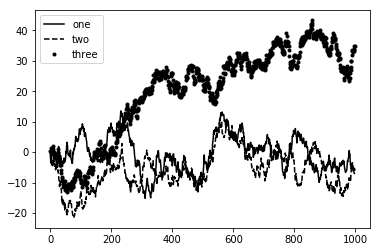

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')


In [33]:
#调整刻度，使用set_xticks和set_xticklabels
ax.legend?

### 9.1.7注解以及在Subplot上绘图

对绘图进行注解，添加文本、箭头或其他图形进行说明，可以通过text、arrow和annotate函数进行添加。
ax.text(x,y,'hello world',
family='monospace',fontsize=10)

In [39]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

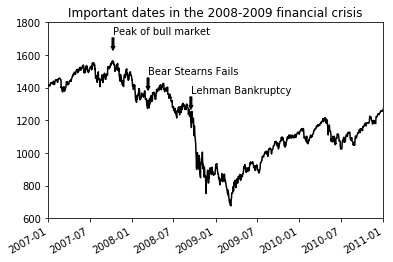

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']
spx.plot(ax = ax,style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [41]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

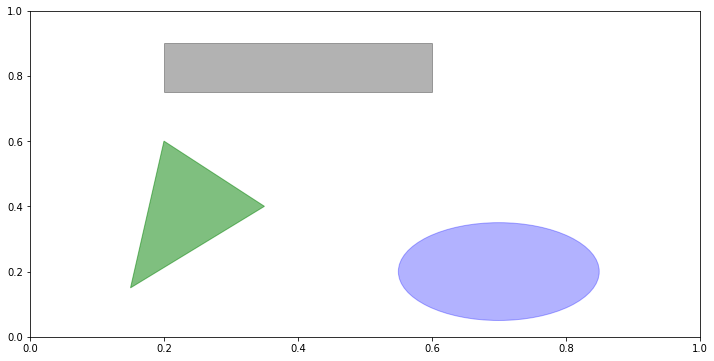

In [42]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.9matplotlib配置

配置图像大小、subplot边距、配色方案、字体大小、网格类型等

## 9.2使用pandas和seaborn绘图
### 9.2.1线型图
Series和DataFrame都有用于生成各种类图表的plot方法，默认情况下生成线型图。

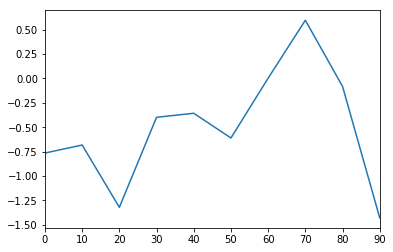

In [44]:
s= pd.Series(np.random.randn(10).cumsum(),
            index=np.arange(0,100,10))
s.plot()

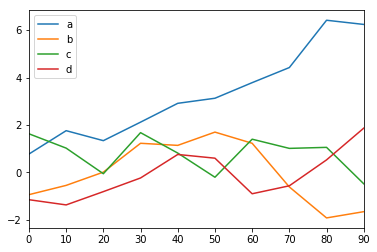

In [49]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
            columns = ['a','b','c','d'],
            index=np.arange(0,100,10))
df.plot()

### 9.2.2柱状图

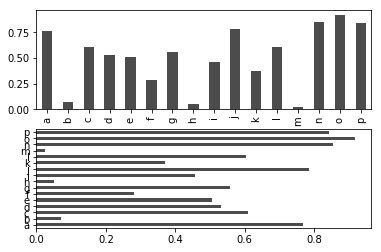

In [50]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [51]:
np.random.seed(12348)

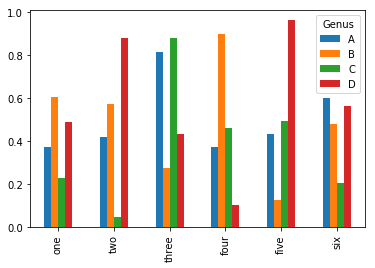

In [52]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

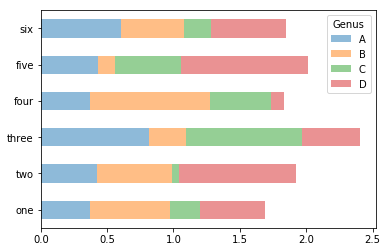

In [53]:
df.plot.barh(stacked=True, alpha=0.5)

### 9.2.3 直方图和密度图

### 9.2.4散布图和点图

### 9.2.5 分面表格和类型数据